<a href="https://colab.research.google.com/github/aguusandy/ic_2023/blob/master/Inteligencia_guia6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Guia 6 Práctica Inteligencia Computacional 2023

#Ejercicio 1:
Implemente las estructuras de datos y algoritmos basicos para la solucion de un problema mediante algoritmos geneticos. Pruebe estas rutinas y compare los resultados con un metodo de gradiente descendiente para buscar el mınimo global de las siguientes funciones:

i) f(x) = −x*sin(sqrt(|x|)) con x ∈ [−512 . . . 512]

ii) f(x, y) = (x^2 + y^2)^(0.25)[sin(50*(x^2 + y^2)^(0.1) + 1)], con x, y ∈ [−100 . . . 100]



In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
  return (-1)*x*np.sin(np.sqrt(np.abs(x)))

In [3]:
def f2(x,y):
  return ((x^2 + y^2)^(0.25))*np.sin(50*(x^2 + y^2)^(0.1) + 1)

In [25]:
def decode(individuo):
  num = 0;  individuo_aux = individuo[::-1];  tamaño_individuo = len(individuo)
  for i in np.arange(0,tamaño_individuo):
    num = num + individuo_aux[i]*(np.power(2,(i),dtype='float32'))
    # print('i ',i,' individuo[i] ',individuo_aux[i])
    # print('suma ',num)
  return num-512

In [ ]:
def binarioADecimal(self,ind,menor,mayor):
  x = 0
  for k,i in enumerate(ind[::-1]):
      x += (i * 2**k)
  x = menor + ((mayor-menor)/ (2**self.numBitsIndividuo-1)) * x

In [ ]:
def repetido(seleccionado,seleccionados):
   bandera = False
   if len(np.where(seleccionados==seleccionado)[0]) > 0:
     bandera = True
   return bandera

In [5]:
def seleccion_competencia(k_seleccionados,tamaño_poblacion,fitness):
  # tomamos al azar k individuos no repetidos y devolvemos el índice del individuo que tenga mejor fitness
  seleccionados = np.full(k_seleccionados,-1)
  for i in np.arange(0,k_seleccionados):
    seleccionado = np.random.randint(low=0,high=tamaño_poblacion)
    while (np.isin(seleccionado, seleccionados)): # verificamos que el seleccionado no sea repetido
      seleccionado = np.random.randint(low=0,high=tamaño_poblacion)
    seleccionados[i] = seleccionado

  #   print('iteracion i = ',i,' seleccionados',seleccionados)
  # print('fitness seleccionados: ',fitness[seleccionados])
  # print('minimo fitness: ', np.argmin(fitness[seleccionados]))
  # print('minimo ',seleccionados[np.argmin(fitness[seleccionados])])
  return seleccionados[np.argmin(fitness[seleccionados])]

In [6]:
def generar_individuo(tamaño_individuo):
  # genera un vector cuyos valores son 0 y 1 al azar
  individuo = np.full(tamaño_individuo,None)
  for i in np.arange(0,tamaño_individuo):
    individuo[i] = np.random.randint(low=0, high=2)
  return individuo

In [7]:
def mutacion_individuo(individuo):
  # tomamos una posición al azar y cambiamos está por 1 o 0 respectivamente
  posicion_mutar = np.random.randint(low=0, high=len(individuo))
  if individuo[posicion_mutar] == 0:
    individuo[posicion_mutar] = 1
  else:
    individuo[posicion_mutar] = 0

In [8]:
def cruza_individuos(individuo1,individuo2):
  # tomamos 2 individuos y generamos un numero al azar dónde se cambiarán dichos valores
  # de los individuos por los del otro
  ind_mutar = np.random.randint(low=0, high=len(individuo1))
  aux = individuo1[ind_mutar:]
  individuo1[ind_mutar:] = individuo2[ind_mutar:]
  individuo2[ind_mutar:] = aux

In [87]:
# ALGORITMO GENETICO:

# i) f(x) = −x*sin(sqrt(|x|)) con x ∈ [−512 . . . 512]

# iniciar la poblacion con su fitness con 10 bits represento el x, ya que x ∈ [−512 . . . 512]
tamaño_individuo = 10
tamaño_poblacion = 10
iteraciones_max = 2000
k_progenitores = 4     # cantidad de progenitores a elegir
paciencia_max = 5

poblacion = np.full(tamaño_poblacion,None)
fitness = np.full(tamaño_poblacion,None)
for i in np.arange(0,tamaño_poblacion):
  poblacion[i] = generar_individuo(tamaño_individuo) # generamos la poblacion de individuos
  fitness[i] = f1(decode(poblacion[i]))   # obtenemos el mejor fitness evaluando toda la poblacion -> f1 funcion de fitness

individuo_mejorFitness = poblacion[np.argmin(fitness)]

progenitores = np.full(k_progenitores,None)
iteracion = 0
paciencia = 0
# mientras
while iteracion < iteraciones_max and paciencia <= paciencia_max:
  # seleccionamos los progenitores -> seleccion por competencia k = 5, numero de progenitores = 10
  for i in np.arange(0,k_progenitores):
    progenitores[i] = seleccion_competencia(5,tamaño_poblacion,fitness)

  # cruza/mutacion de la proxima generacion
  for i in np.arange(0,k_progenitores,2):
    if np.random.rand() <= 0.9: # probabilidad_cruza <= 0.9
      cruza_individuos(poblacion[progenitores[i]],poblacion[progenitores[i+1]])
    if np.random.rand() <= 0.1: # probabilidad_mutacion <= 0.1
      mutacion_individuo(poblacion[progenitores[i]])
      mutacion_individuo(poblacion[progenitores[i+1]])
  # obtenemos el mejor fitness evaluando la nueva poblacion
  for i in np.arange(0,tamaño_poblacion):
    fitness[i] = f1(decode(poblacion[i]))
  individuo_mejorFitness_aux = poblacion[np.argmin(fitness)]
  if f1(decode(individuo_mejorFitness_aux)) < f1(decode(individuo_mejorFitness)):
    individuo_mejorFitness = individuo_mejorFitness_aux
    paciencia = 0
  else:
    paciencia+=1

  iteracion+=1
# endwhile

Cantidad de iteraciones:  6
Individuo con mejor fitness:  417.0
Mejor fitness encontrado:  -416.99998938753396


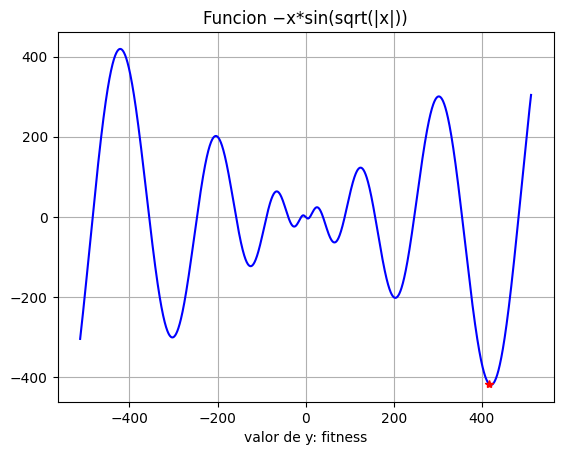

In [89]:
print('Cantidad de iteraciones: ',iteracion)
print('Individuo con mejor fitness: ',decode(individuo_mejorFitness))
print('Mejor fitness encontrado: ',f1(decode(individuo_mejorFitness)))
x = np.linspace(-512, 512,num=2048)
y = f1(x)
#mejor =
plt.plot(x,y,'b-')
plt.plot(decode(individuo_mejorFitness),f1(decode(individuo_mejorFitness)),'*r')
plt.title('Funcion −x*sin(sqrt(|x|))')
plt.xlabel('valor de x: individuo')
plt.xlabel('valor de y: fitness')
plt.grid()
plt.show()

In [ ]:
def decode2(individuo):
  num = [0,0];  individuo_aux = individuo[::-1];  tamaño_individuo = len(individuo); mitad = int(tamaño_individuo/2)
  print('rango x ',individuo_aux[0:mitad])
  print('rango y ',individuo_aux[mitad:])
  for i in np.arange(0,mitad):
    num[0] = num[0] + individuo_aux[i]*(np.power(2,(i),dtype='float32'))
  for i in np.arange(mitad,tamaño_individuo):
    num[1] = num[1] + individuo_aux[i]*(np.power(2,(i-mitad),dtype='float32'))
  return num

In [ ]:
 # ii) f(x, y) = (x^2 + y^2)^(0.25)[sin(50*(x^2 + y^2)^(0.1) + 1)], con x, y ∈ [−100 . . . 100]

# con 8 bits represento el x, ya que x ∈ [−100 . . . 100]
# y con 16 represento los valores para x y para y,
tamaño_individuo = 16
tamaño_poblacion = 100
#fitnessRequerido = 0
iteraciones_max = 2000
k_progenitores = 10
poblacion = np.full(tamaño_poblacion,None)
for i in np.arange(0,tamaño_poblacion):
  poblacion[i] = generar_individuo(tamaño_individuo)
fitness = np.full(tamaño_poblacion,None)
for i in np.arange(0,tamaño_poblacion):
  fitness[i] = f2(decode(poblacion[i])-np.array([10,10]))   # f2 funcion de fitness
mejorFitness = fitness[np.argmin(fitness)]
iteracion = 0
while iteracion < iteraciones_max:
  progenitores = np.full(k_progenitores,None)
  for i in np.arange(0,k_progenitores):
    progenitores[i] = seleccion_competencia(k_progenitores,tamaño_poblacion,fitness)
  for i in np.arange(0,k_progenitores,2):
    probabilidad_cruza = np.random.rand()
    if probabilidad_cruza <= 0.9:
      cruza_individuos(poblacion[progenitores[i]],poblacion[progenitores[i+1]])
    probabilidad_mutacion = np.random.rand()
    if probabilidad_mutacion <= 0.1:
      mutacion_individuo(poblacion[progenitores[i]])
      mutacion_individuo(poblacion[progenitores[i+1]])
  for i in np.arange(0,tamaño_poblacion):
    fitness[i] = f2(decode(poblacion[i])-np.array([10,10]))
  mejorFitness = fitness[np.argmin(fitness)]

  iteracion+=1
# endwhile

In [ ]:
print(decode2([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])-np.array([100,100]))

rango x  [0, 0, 0, 0, 0, 0, 0, 0]
rango y  [0, 0, 0, 0, 0, 0, 0, 1]
[-100.   28.]


In [ ]:
print(decode2([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])-np.array([100,155]))

rango x  [0, 0, 0, 0, 0, 0, 0, 0]
rango y  [1, 1, 1, 1, 1, 1, 1, 1]
[-100.  100.]



#Ejercicio 2:
Disene e implemente un algoritmo genetico que busque el mejor subconjunto de caracterısticas para la clasificacion de cancer leucemia linfocıtica aguda y leucemia mielogena aguda) a partir de datos genomicos. Se proveen 38 muestras en el conjunto de entrenamiento y 34 en el conjunto de prueba (leukemia train.csv y leukemia test.csv, respectivamente). Cada muestra se compone de un total de 7129 caracterısticas, que corresponden a valores de expresion genica

In [ ]:
import numpy as np
train_leukemia = np.genfromtxt("leukemia_train.csv", delimiter="," , skip_header=1)
print(np.min(train_leukemia))
print(np.max(train_leukemia))

-28400.0
61228.0


In [ ]:
# ALGORITMO GENETICO:

# i) f(x) = −x*sin(sqrt(|x|)) con x ∈ [−512 . . . 512]

# iniciar la poblacion con su fitness
# con 9 bits represento el x, ya que x ∈ [−512 . . . 512]
tamaño_individuo = 7129   # cantidad de caracteristicas?
tamaño_caracterisca = 17  #2^17 =   131.072 > 61.228 x2
tamaño_poblacion = 38 # 38 datos de prueba
fitnessRequerido = -2**10 # ni deea que poner aca che
iteraciones_max = 2000
k_progenitores = 10     # cantidad de progenitores a elegir
# generamos la poblacion de individuos
poblacion = np.full((tamaño_poblacion,tamaño_individuo),None)

for i in np.arange(0,tamaño_poblacion):
  for j in range(tamaño_individuo):
    poblacion[i,j] = generar_individuo(tamaño_caracterisca)
# obtenemos el mejor fitness evaluando toda la poblacion
fitness = np.full(tamaño_poblacion,None)
for i in np.arange(0,tamaño_poblacion): # estos dos for no se podrian juntar???????????
  suma = 0
  for j in range(tamaño_individuo)
    suma+= f1(decode(poblacion[i,j])-2**17)   # f1 funcion de fitness
fitness[i] = np.average(suma) # le mando promedio de caracteriscas porque la verdad no se que ponerle

#mejorFitness_aux = fitness[np.argmin(fitness)]
mejorFitness = np.min(fitness)
print('mejor fitness inicial',mejorFitness)
# mientras mejorFitness < fitnessRequerido
iteracion = 0
while iteracion < iteraciones_max:
  # seleccionamos los progenitores -> seleccion por competencia k = 5, numero de progenitores = 10
  progenitores = np.full(k_progenitores,None)
  for i in np.arange(0,k_progenitores):
    progenitores[i] = seleccion_competencia(k_progenitores,tamaño_poblacion,fitness)
    # while repetido(progenitores[i], progenitores) == True:
      # progenitores[i] = seleccion_competencia(k,tamaño_poblacion,fitness)
  # cruza/mutacion de la proxima generacion
  for i in np.arange(0,k_progenitores,2):
    probabilidad_cruza = np.random.rand()
    if probabilidad_cruza <= 0.9:
      cruza_individuos(poblacion[progenitores[i]],poblacion[progenitores[i+1]]) # habria que hacer una nueva funcion de cruza y mutacion?
    probabilidad_mutacion = np.random.rand()
    if probabilidad_mutacion <= 0.1:
      mutacion_individuo(poblacion[progenitores[i]])
      mutacion_individuo(poblacion[progenitores[i+1]])
  # obtenemos el mejor fitness evaluando la nueva poblacion
  for i in np.arange(0,tamaño_poblacion):
    fitness[i] = f1(decode(poblacion[i])-512)
  #mejorFitness_aux = fitness[np.argmin(fitness)]
  mejorFitness_aux = np.min(fitness)
  if mejorFitness_aux < mejorFitness:
    mejorFitness = mejorFitness_aux
    print('nuevo mejor fitness ',mejorFitness)
  iteracion+=1
# endwhile

<ipython-input-9-60fef9f0d149>:4: RuntimeWarning: overflow encountered in power
  num = num + individuo_aux[i]*(np.power(2,(i),dtype='float32'))
<ipython-input-9-60fef9f0d149>:4: RuntimeWarning: invalid value encountered in multiply
  num = num + individuo_aux[i]*(np.power(2,(i),dtype='float32'))


TypeError: ignored